# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [7]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

(torch.Size([64, 1, 28, 28]), torch.Size([64]), 60000)

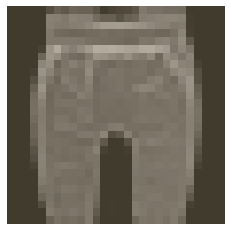

In [8]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);
image.shape, label.shape, len(trainset)

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [9]:
# TODO: Define your network architecture here
from torch import nn
from torch.nn import functional as F
class Network(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128,  64)
        self.out = nn.Linear( 64,  10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        y = F.log_softmax(x, dim=1)
        return y

model = Network()
from torchsummary import summary
summary(model, input_size=(1,784), batch_size=-1,device='cpu')
model

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 512]         401,920
            Linear-2               [-1, 1, 128]          65,664
            Linear-3                [-1, 1, 64]           8,256
            Linear-4                [-1, 1, 10]             650
Total params: 476,490
Trainable params: 476,490
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.82
Estimated Total Size (MB): 1.83
----------------------------------------------------------------


Network(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [10]:
# TODO: Create the network, define the criterion and optimizer
from torch import optim
model = Network()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

In [11]:
# TODO: Train the network here
def train_loop(dataloader, model, loss_fn, optimizer, verbose='display'):
    size = len(dataloader.dataset)
    running_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.view(X.shape[0], -1)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss
        
        if verbose == 'display':
            if (batch + 1) % 100 == 0:
                loss, current = loss.item(), (batch+1) * len(X)
                print(f"\r\t{batch+1:3d} batch loss: {loss:>7f}  [{current:>5d}/{size:>5d}]", end='')
    if verbose == 'display':
        print(f"\n\tTraining loss: {running_loss/len(trainloader)}")

In [12]:
epochs = 6
for e in range(epochs):
    print(f'Epoch {e+1}\n-------------------------------')
    train_loop(trainloader,model,criterion,optimizer,'display')
print("Done!")

Epoch 1
-------------------------------
	900 batch loss: 0.777037  [57600/60000]
	Training loss: 1.2904620170593262
Epoch 2
-------------------------------
	900 batch loss: 0.509533  [57600/60000]
	Training loss: 0.5938360691070557
Epoch 3
-------------------------------
	900 batch loss: 0.389623  [57600/60000]
	Training loss: 0.5081209540367126
Epoch 4
-------------------------------
	900 batch loss: 0.653961  [57600/60000]
	Training loss: 0.4622171223163605
Epoch 5
-------------------------------
	900 batch loss: 0.495363  [57600/60000]
	Training loss: 0.43466243147850037
Epoch 6
-------------------------------
	900 batch loss: 0.450898  [57600/60000]
	Training loss: 0.41290321946144104
Done!


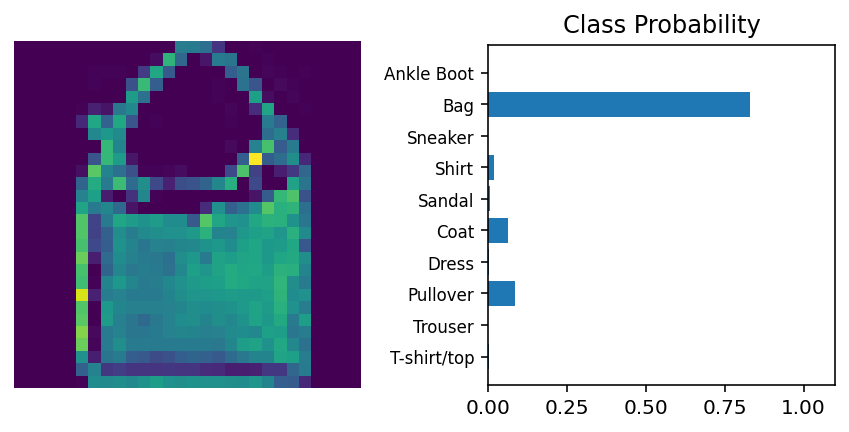

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
out = model(img)
ps = torch.exp(out)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')